# Deep learning models for Data Augmentation

## Import lib and read data

In [1]:
import numpy as np
import pandas as pd 
import Augmentor
# import matplotlib as mpl   
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.signal import find_peaks, savgol_filter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LeakyReLU, BatchNormalization, MaxPooling1D, Dropout
# from keras.utils import to_categorical
# import glob

2023-12-05 12:01:12.481522: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 12:01:12.650602: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 12:01:12.651725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 12:01:13.393272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("../../input/data.csv")

In [3]:
display(data.head().T, data.shape)

,0,1,2,3,4
320,-1.388896,16.722093,0.329687,-10.598846,10.015236
321,0.05821,-1.186429,-0.747993,-5.978379,12.575455
322,5.898464,-10.186022,-1.588051,1.822014,13.012607
323,5.849397,-3.832706,0.152671,12.90642,13.932454
324,2.37903,12.73007,5.357345,21.049637,13.677982
...,...,...,...,...,...
1648,1.384356,-4.633642,-5.380405,10.001486,35.561525
1649,16.59277,-6.431111,-6.852814,1.22302,37.348663
1650,8.760738,25.847542,-2.682321,1.914469,11.53166
Diagnostic,Streptavidin,Streptavidin,Streptavidin,S,S


(89, 1333)

## Data prep

In [5]:
def data_preprocessing(data):

    X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
    X.columns = X.columns.astype(int)
    y = data['Diagnostic'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    label_encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = label_encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_encoded = label_encoder.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train_encoded, y_test_encoded

In [6]:
def data_preprocessing_bin(data):

    X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
    X.columns = X.columns.astype(int)
    y = data['COVID-19_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    return X_train, X_test, y_train_encoded, y_test_encoded

In [4]:
X = data.drop(['Diagnostic', 'COVID-19_Status'], axis=1)
X.columns = X.columns.astype(int)
y_diagnostic = data['Diagnostic']
y_covid_status = data['COVID-19_Status']

wavelength = X.columns
intensity = X.values

### Augmentatoin

In [5]:
def plot_spectral_data(wavelength, intensity, label):
    # fig, ax = plt.subplots(facecolor='#242424')
    fig, ax = plt.subplots()

    sns.lineplot(x=wavelength, y=intensity, ax=ax, label=f'{label}')
    ax.set_title("Раман спектр өгөгдлийн дээж 1", color='white')
    ax.set_xlabel('Долгионы урт', color='white')
    ax.set_ylabel('Intensity', color='white')
    ax.legend()

    plt.show()

In [3]:
# def apply_noise(data, percentage_noise=5):
#     noise = np.random.normal(0, percentage_noise * 0.01 * np.max(data), data.shape)
#     return data + noise

In [45]:
multiclass_max_spectrum = data.drop(['COVID-19_Status'], axis=1).groupby('Diagnostic').max()

intensity_max = multiclass_max_spectrum.values
y_max = multiclass_max_spectrum.index.tolist()

multiclass_min_spectrum = data.drop(['COVID-19_Status'], axis=1).groupby('Diagnostic').min()

intensity_min = multiclass_min_spectrum.values
y_min = multiclass_min_spectrum.index.tolist()

In [56]:
augmented_label_data = []

for i, label in enumerate(y_max):
    augmented_sample = np.random.uniform(intensity_min[i], intensity_max[i]).reshape(1, -1)
    augmented_sample = pd.DataFrame(augmented_sample)
    augmented_sample.columns = wavelength
    augmented_sample['Diagnostic'] = label
    augmented_label_data.append(augmented_sample)
    augment_df = pd.concat(augmented_label_data, ignore_index=True)

In [76]:
augment_df.T

,0,1,2,3,4
320,-57.150521,14.649124,-17.115457,1.718065,11.689058
321,3.703574,-18.662653,9.623652,-0.192347,2.430875
322,-14.738325,-19.688308,-24.838922,-3.463828,16.873017
323,-24.48513,9.333005,34.7138,-3.724572,20.030521
324,-20.140298,-15.884383,23.872316,6.370919,-3.432684
...,...,...,...,...,...
1647,-27.100179,29.739188,16.581952,18.394087,20.094248
1648,-12.253188,-12.888306,-23.454774,-0.713095,11.187391
1649,9.262405,14.076796,-2.671876,16.185015,-8.884097
1650,3.295394,14.078632,-11.739284,-2.073044,-4.482212


In [69]:
aug_intensity = augment_df.drop(['Diagnostic'], axis=1).values

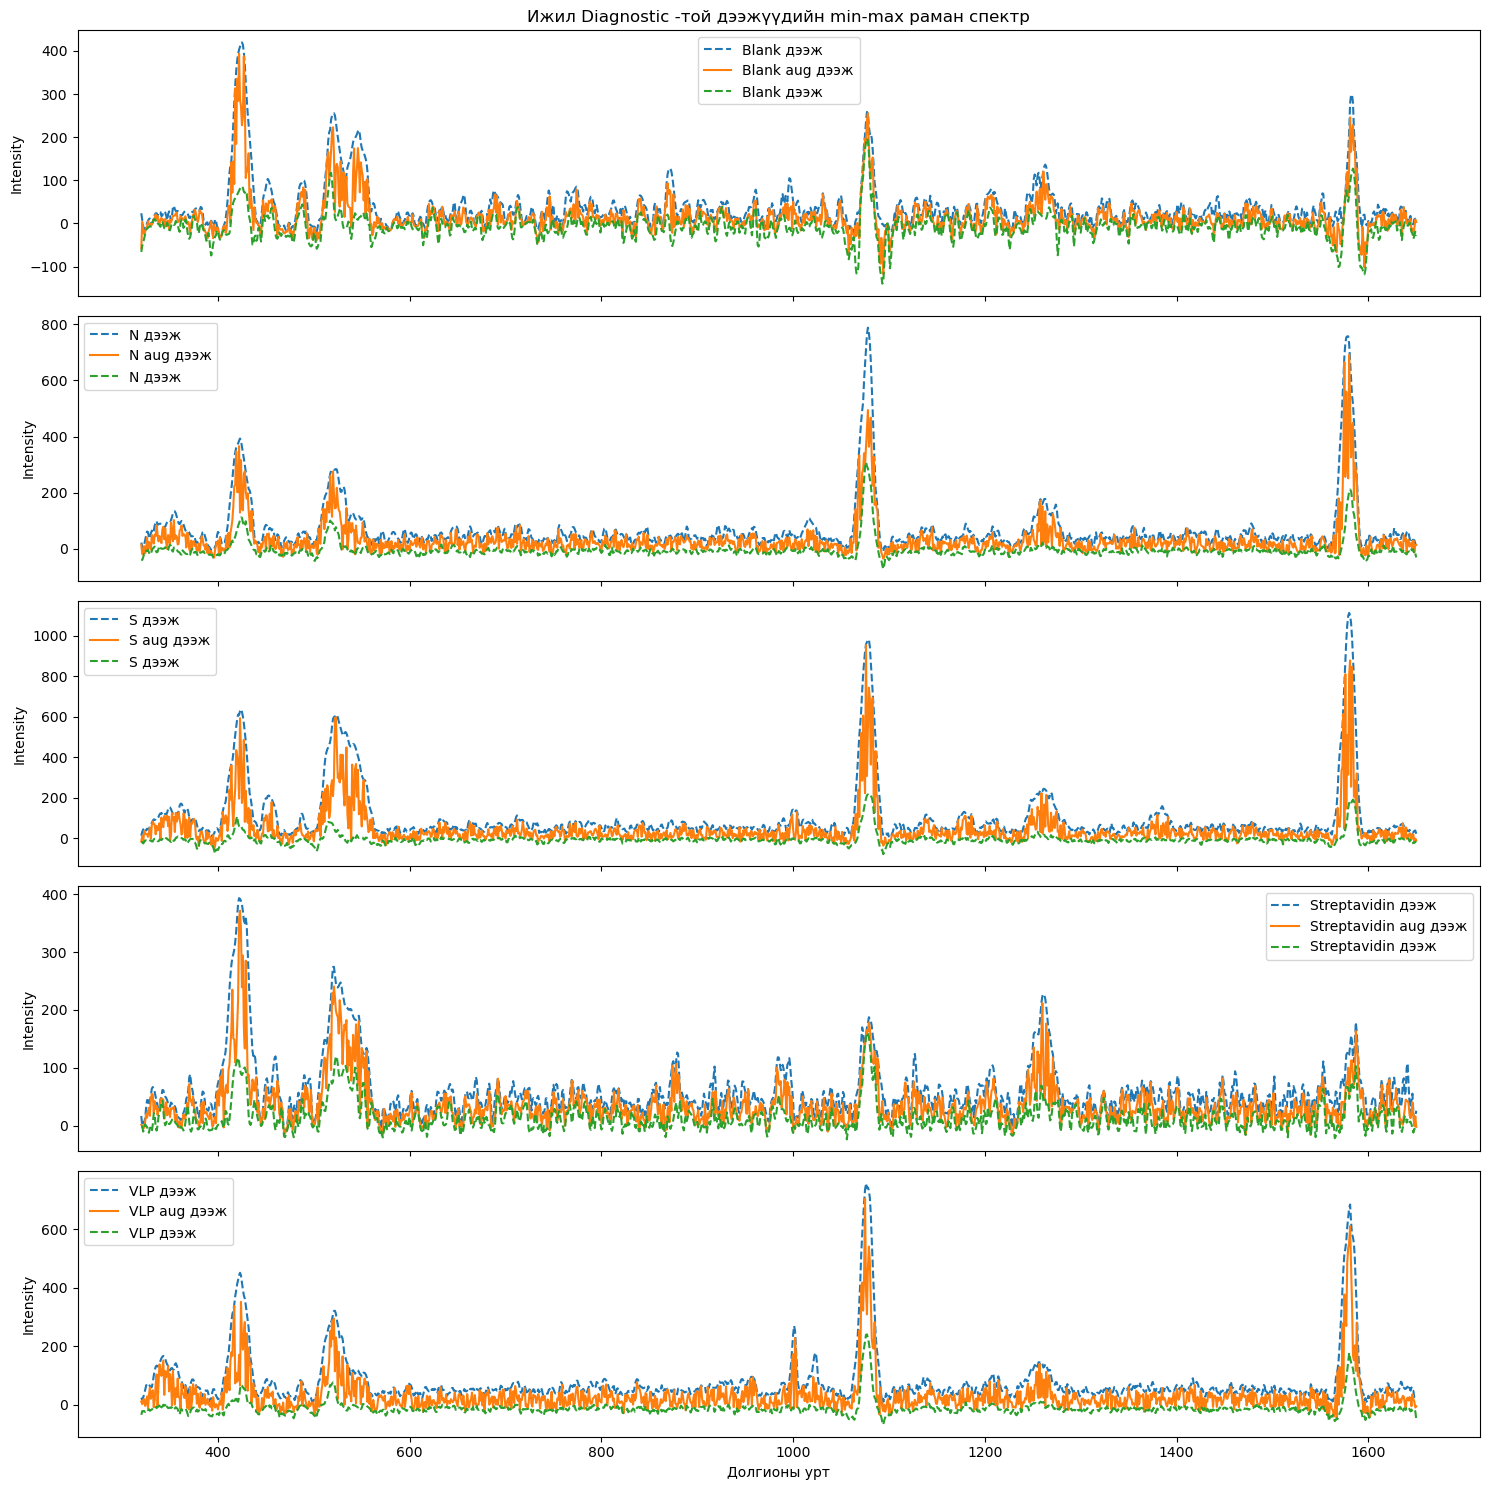

In [75]:
fig, axs = plt.subplots(len(intensity_max), 1, sharex=True, figsize=(15, 15))

for i in range(len(intensity_max)):
    axs[i].plot(wavelength, intensity_max[i], linestyle='dashed', label=f'{y_max[i]} дээж')

    axs[i].plot(wavelength, aug_intensity[i], label=f'{y_min[i]} aug дээж')

    axs[i].plot(wavelength, intensity_min[i], linestyle='dashed', label=f'{y_min[i]} дээж')
    
    axs[i].set_ylabel('Intensity')
    axs[i].legend()

axs[0].set_title("Ижил Diagnostic -той дээжүүдийн min-max раман спектр")
axs[len(intensity_max) - 1].set_xlabel('Долгионы урт')
plt.tight_layout()

plt.show()

In [6]:
def apply_offset(data, offset_factor=0.10):
    offset_range = data.std() * offset_factor
    offset_var = np.random.uniform(-offset_range, offset_range)
    return data + offset_var

In [33]:
def apply_mult(data, mult_factor=0.10):
    mult_var = np.random.uniform(1 - mult_factor, 1 + mult_factor)
    return data * mult_var

In [8]:
def apply_smoothing(data, window_size=5):
    kernel = np.ones(window_size) / window_size
    return np.convolve(data, kernel, mode='same')

In [34]:
def augment_data(original_data, num_augmented_samples=1):
    augmented_data = []

    for _ in range(num_augmented_samples):
        augmented_data.append(apply_offset(original_data))
        augmented_data.append(apply_mult(original_data))
        augmented_data.append(apply_smoothing(original_data))

    return np.array(augmented_data)

In [35]:
original_sample = intensity[0]

augmented_samples = augment_data(original_sample, num_augmented_samples=1)

In [20]:
original_sample.std()

57.62097562447128

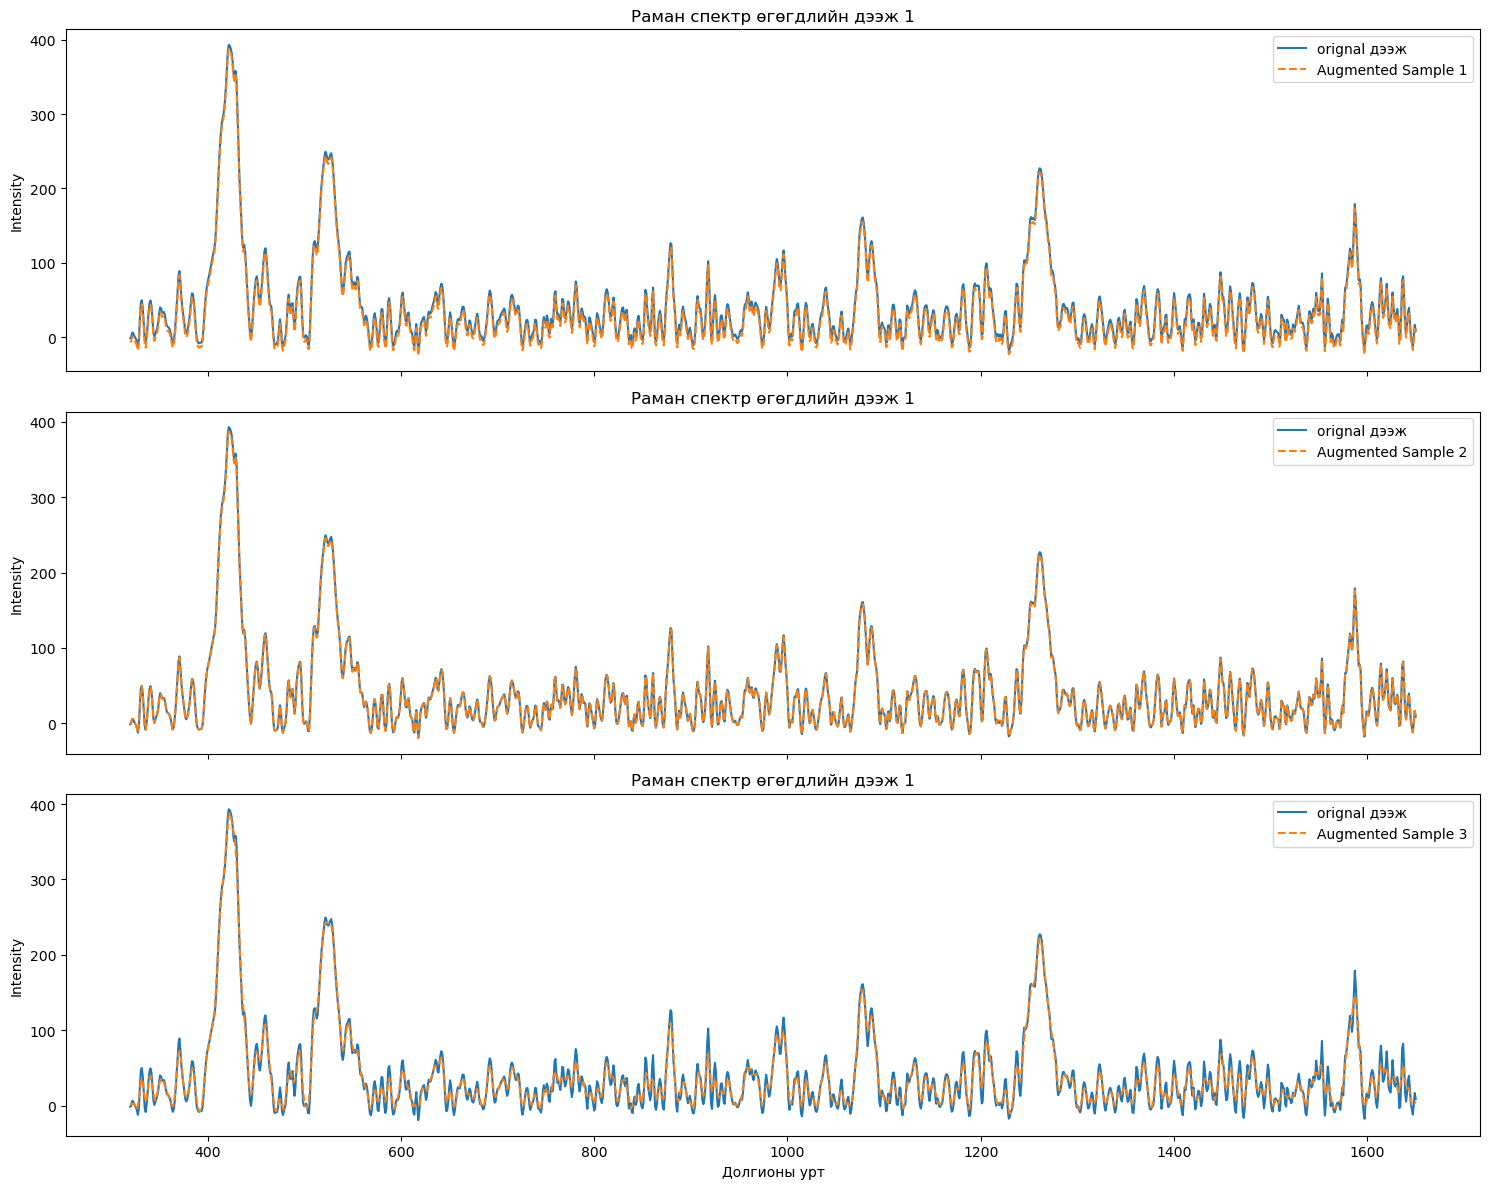

In [78]:
fig, axs = plt.subplots(len(augmented_samples), sharex=True, figsize=(15, 12))

for i, augmented_sample in enumerate(augmented_samples):
    # sns.lineplot(x=wavelength, y=original_sample, label=f'Original Spectral Data')
    axs[i].plot(wavelength, original_sample, label=f'orignal дээж')
    axs[i].set_title("Раман спектр өгөгдлийн дээж 1")

    # sns.lineplot(x=wavelength, y=augmented_sample, label=f'Augmented Sample {i+1}')
    axs[i].plot(wavelength, augmented_sample, linestyle='dashed', label=f'Augmented Sample {i+1}')
    axs[i].set_ylabel('Intensity')
    axs[i].legend()

axs[len(augmented_samples) - 1].set_xlabel('Долгионы урт')
plt.tight_layout()
plt.show()

## GAN (Generative Adversial Network)

## Others

## Report